In [101]:
# Importando bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset
df = pd.read_csv('matchs_2023.csv')

# Testando visibilidade do dataset
df.head(5)

C:\Users\yandrade\AppData\Local\Temp\ipykernel_45372\3892024937.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('matchs_2023.csv')


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [103]:
# Selecionando somente as linhas relacionadas ao CBLOL
df2 = df.loc[df['league'] == 'CBLOL']

# Criando os 2 Dataframes que serão utilizados para obter os dados dos gráficos
df_suportes = df2.loc[df2['position'] == 'sup']

df_suportes = df_suportes.drop(df_suportes.loc[df_suportes['playername'] == 'unknown player'].index)

print(df_suportes)



                       gameid datacompleteness  url league  year    split  \
2332    ESPORTSTMNT03_3087499         complete  NaN  CBLOL  2023  Split 1   
2337    ESPORTSTMNT03_3087499         complete  NaN  CBLOL  2023  Split 1   
2356    ESPORTSTMNT03_3086486         complete  NaN  CBLOL  2023  Split 1   
2361    ESPORTSTMNT03_3086486         complete  NaN  CBLOL  2023  Split 1   
2380    ESPORTSTMNT03_3087532         complete  NaN  CBLOL  2023  Split 1   
...                       ...              ...  ...    ...   ...      ...   
119865  ESPORTSTMNT02_3233840         complete  NaN  CBLOL  2023  Split 2   
119884  ESPORTSTMNT02_3233842         complete  NaN  CBLOL  2023  Split 2   
119889  ESPORTSTMNT02_3233842         complete  NaN  CBLOL  2023  Split 2   
119908  ESPORTSTMNT02_3233843         complete  NaN  CBLOL  2023  Split 2   
119913  ESPORTSTMNT02_3233843         complete  NaN  CBLOL  2023  Split 2   

        playoffs                 date  game  patch  ...  opp_csat15  \
2332

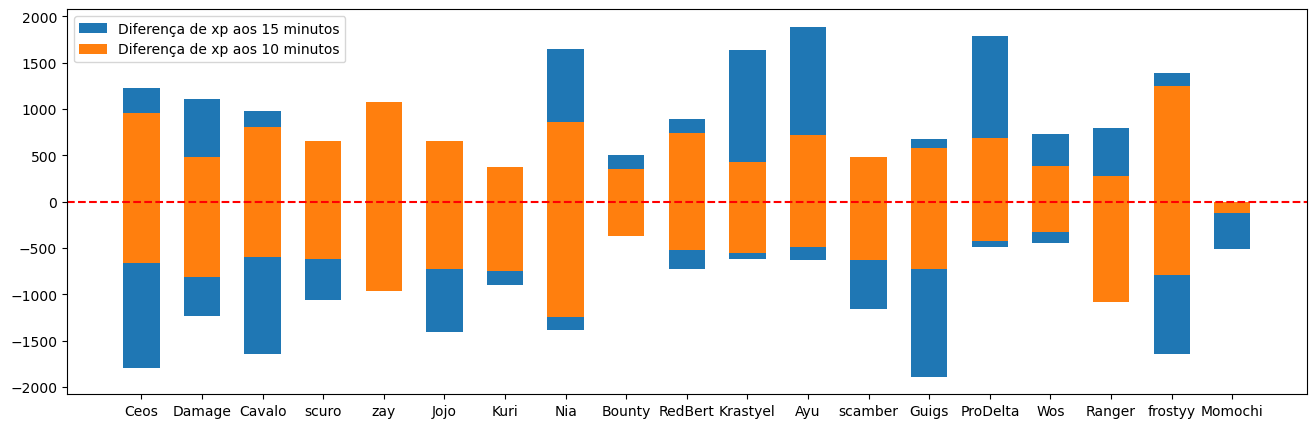

In [132]:
# Aumentando o comprimento da figura
plt.figure(figsize=(16,5))

# Plotando 
plt.bar(
    x=df_suportes['playername'],
    height=df_suportes['xpdiffat15'],
    width=0.6,
    label = 'Diferença de xp aos 15 minutos'
)

plt.bar(
    x=df_suportes['playername'],
    height=df_suportes['xpdiffat10'],
    width=0.6,
    label='Diferença de xp aos 10 minutos'
)

# Criando a linha média
plt.axhline(df_suportes['xpdiffat15'].mean(), color='red', linestyle='--')

# Colocando a legenda e mudando seu posicionamento no gráfico
plt.legend(loc='upper left')

C:\Users\yandrade\AppData\Local\Temp\ipykernel_45372\4055565939.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df_suportes.groupby(df_suportes['playername'])['visionscore', 'vspm'].mean().reset_index()


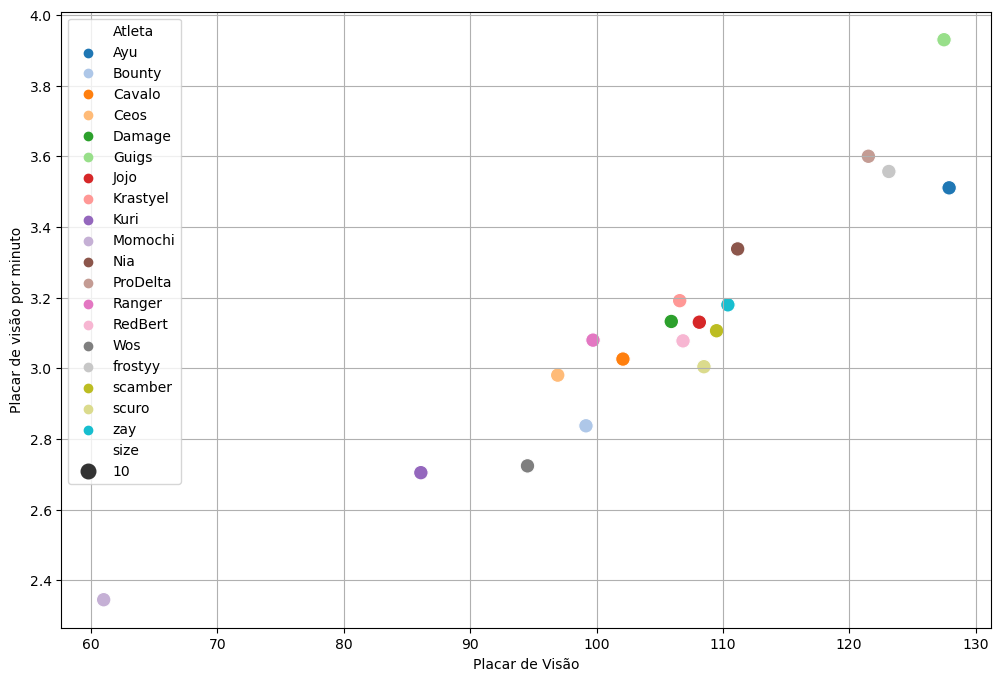

In [212]:
plt.figure(figsize=(12,8))

# Criando um dataframe completo somando dados a partir do nome dos jogadores e gerando uma média deles
# Agrupei os dados pelo nome dos jogadores
# Pedi para que esses dados já filtrados pegassem duas colunas do dataframe original e gerasse uma média deles
# Resetei o index para que a coluna do groupby se tornasse uma coluna do novo dataframe
    #   do contrário a coluna do groupby se torna um index

df3 = df_suportes.groupby(df_suportes['playername'])['visionscore', 'vspm'].mean().reset_index()

# Criando uma função para aplicar o size
def sizing_vision(number):
    size = [number for i in range (19)]
    df3['size'] = size

# Chamando a função
sizing_vision(10)

# Renomeando a coluna para organizar a legenda. Assim o título da legenda não fica 'playername'
df3 = df3.rename(columns={'playername':'Atleta'})

sns.scatterplot(
    data=df3,   # Dataframe de onde eu irei obter os dados
    x=df3['visionscore'],   # Eixo x  do gráfico
    y=df3['vspm'],   # Eixo y do gráfico
    hue=df3['Atleta'],   # Filtro de cores dos dados
    palette='tab20',   # Paleta de cores que será utilizada pelo filtro dos dados
    #style=df3['playername'],   # Muda o estilo dos marcadores de acordo com a legenda
    size=df3['size'],
    sizes=(110,110),
).set(xlabel='Placar de Visão', ylabel='Placar de visão por minuto')   # Mudando os nomes do eixo x e y

plt.legend()
plt.grid()

In [ ]:
df